<a href="https://colab.research.google.com/github/isaserpa-cmyk/54891121/blob/main/projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto 2 - Perceptrons
Aluna: Isabela Novello Serpa - 202410099411

In [1]:
import numpy as np

class IsaPerceptron():

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        ''' método de inicialização que tem os seguintes atributos:
            no_of_inputs: número de features passadas como input ao perceptron
            threshold: número de iterações de atualização do peso
            learning_rate: taxa com a qual os pesos são atualizados a cada iteração
            weights: inicialização dos pesos
        '''
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1) # +1 por causa do bias

    def predict(self, inputs):
        '''
        método de implementação da função de ativação.
        inputs: array com o conjunto de inputs (features).
        '''
        ativaçao = np.dot(inputs, self.weights[1:]) + self.weights[0] # Calcula a soma ponderada dos inputs com o peso

        if ativaçao > 0:
            return 1
        else:
            return 0


    def train(self, training_inputs, labels):
        '''
        método de treino. É aqui que os pesos são atualizados um certo número de vezes (determinado pelo valor do threshold).
        Nesse método é feita a comparação entre o resultado da função de ativação (predição) e
        o resultado esperado (label).
        O método deve atualizar tanto os pesos quanto o bias (o primeiro peso).
        A atualização é feita iterativamente um número (threshold) de vezes.
        '''
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs # atualiza os pesos das features
                self.weights[0] += self.learning_rate * error # atualiza as bias

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

# Usando apenas 2 features, comprimento e largura da pétala
x_petala = iris.data[:, (2,3)] # comprimento e peso da pétala
y = (iris.target == 0).astype(int) # Iris Setosa

perceptron_petala = IsaPerceptron(2, 100, 0.01)
perceptron_petala.train(x_petala, y)

pred_petala = perceptron_petala.predict([1, 0.5])
if pred_petala == 1:
 print(pred_petala, ": é uma íris Setosa")
else:
 print(pred_petala,": não é uma íris Setosa")



1 : é uma íris Setosa


In [3]:
# Usando 4 features, sepala e pétala
x = iris.data[:,(0,1,2,3)] # comprimento e peso da pétala
y = (iris.target == 0).astype(int) # Iris Setosa

perceptron = IsaPerceptron(4, 100, 0.01)
perceptron.train(x, y)

pred = perceptron.predict([5.1, 3.5, 2, 0.5])

if pred == 1:
 print(pred, ": é uma íris Setosa")
else:
 print(pred,": não é uma íris Setosa")



1 : é uma íris Setosa


Acurácia do IsaPerceptron: 0.28888888888888886
Acurácia do Perceptron do scikit-learn: 0.8222222222222222


<function matplotlib.pyplot.show(close=None, block=None)>

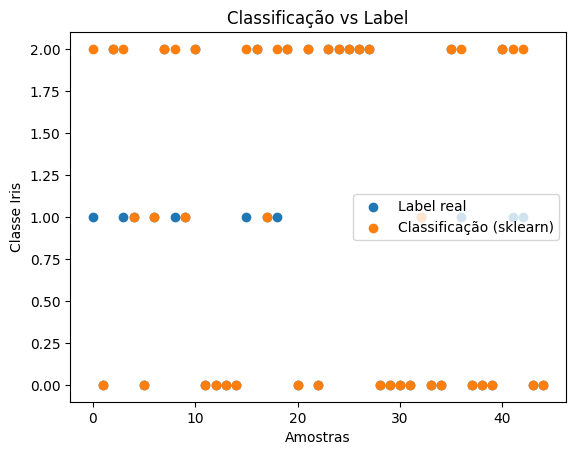

In [4]:
# Comparar os resultados com a classe Peceptron do módulo do scikit-learn linear_model e  gráfico
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #separar teste e treino

# IsaPerceptron
isa_perceptron = IsaPerceptron(4, 100, 0.01)
isa_perceptron.train(x_train, y_train)

y_pred_isa= np.array([isa_perceptron.predict(x) for x in x_test])
acc_isa = accuracy_score(y_test, y_pred_isa)

# Perceptron scikit-learn
sk_perceptron = Perceptron()
sk_perceptron.fit(x_train, y_train)

y_pred_sk = sk_perceptron.predict(x_test)
acc_sk = accuracy_score(y_test, y_pred_sk)

# Resultados
print("Acurácia do IsaPerceptron:", acc_isa)
print("Acurácia do Perceptron do scikit-learn:", acc_sk)

# Gráfico: Classificação vs Label
plt.figure()
plt.scatter(range(len(y_test)), y_test, label="Label real")
plt.scatter(range(len(y_pred_sk)), y_pred_sk, label="Classificação (sklearn)")
plt.xlabel("Amostras")
plt.ylabel("Classe Iris")
plt.title("Classificação vs Label")
plt.legend()
plt.show

## Conclusão
O Perceptron é um classificador binário para decisões simples, como situações de sim ou não. Outros exemplos que pode ser aplicado á distinção entre sinal e ruído e à detecção de eventos. No entanto, por ser um modelo linear, apresenta limitações em problemas linearmente separáveis ou quando há grande sobreposição entre as classes.